In [1]:
import pandas as pd
import numpy as np

In [2]:
!ls

logistic_regression_updated.py	 main.py   train.csv	    Untitled.ipynb
logistic_regression_updated.pyc  test.csv  Untitled1.ipynb


In [3]:
!head -10 train.csv

ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
1,36724,14457,118219,118220,117884,117879,267952,19721,117880
1,36135,5396,117961,118343,119993,118321,240983,290919,118322
1,42680,5905,117929,117930,119569,119323,123932,19793,119325
0,45333,14561,117951,117952,118008,118568,118568,19721,118570
1,25993,17227,117961,118343,123476,118980,301534,118295,118982
1,19666,4209,117961,117969,118910,126820,269034,118638,126822
1,31246,783,117961,118413,120584,128230,302830,4673,128231


In [4]:
train = pd.read_csv('train.csv')

In [5]:
test = pd.read_csv('test.csv')

In [6]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [104]:
train.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


In [14]:
train.shape

(32769, 10)

In [65]:
def f(x):
    return len(np.unique(x))

In [109]:
pd.concat([train.agg([min, max]).T, train.agg(f).to_frame()], axis=1).T

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
min,0,0,25,4292,23779,4674,117879,4673,3130,117880
max,1,312153,311696,311178,286791,286792,311867,311867,308574,270691
0,2,7518,4243,128,177,449,343,2358,67,343


In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
ohe = OneHotEncoder()

In [9]:
X_train = train.iloc[:, 1:]

In [10]:
y_train = train.iloc[:, 0]

In [11]:
X_test = test.iloc[:, 1:]

In [12]:
X_total = pd.concat([X_train, X_test])

In [13]:
X_total_ohe = ohe.fit_transform(X_total)

In [15]:
n_train = X_train.shape[0]

In [16]:
X_train_ohe = X_total_ohe[:n_train,]

In [17]:
X_test_ohe = X_total_ohe[n_train:,]

In [18]:
from sklearn.svm import SVC

In [19]:
svm = SVC(probability=True)

In [85]:
clf.fit(X_train_ohe, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
y_test_pred = clf.predict_proba(X_test_ohe)

In [87]:
submit_data = pd.DataFrame(columns=['ID', 'ACTION'])

In [88]:
submit_data['ID'] = test.id

In [89]:
submit_data['ACTION'] = y_test_pred

In [90]:
submit_data.to_csv('submit.csv', index=False)

In [41]:
!head -10 submit.csv

ID,ACTION
1,0.0529831286064
2,0.0404562637596
3,0.0154604194242
4,0.0252211356251
5,1.07708565389e-05
6,0.0231035286149
7,0.0319142620812
8,0.0061057089802
9,0.0978558668646


### Cross Validation

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
clf = RandomForestClassifier()

In [67]:
from sklearn.linear_model import LogisticRegression

In [76]:
clf = LogisticRegression?

In [ ]:
clf = LogisticRegression

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import KFold

roc_auc_scores = [] 
for train_ind, cv_ind in KFold(X_train.shape[0]):
    X_tr = X_train_ohe[train_ind]
    y_tr = y_train[train_ind]
    
    X_cv = X_train_ohe[cv_ind]
    y_cv = y_train[cv_ind]
    
    clf.fit(X_tr, y_tr)
    y_cv_pred = clf.predict_proba(X_cv)
    roc_auc_scores.append(roc_auc_score(y_cv, y_cv_pred[:, 1]))
    print roc_auc_scores

[0.86939839137772978]
[0.86939839137772978, 0.84322097494659165]
[0.86939839137772978, 0.84322097494659165, 0.8538782020082516]


### Learning Curves

In [54]:
X_train_ohe.shape

(32769, 16961)

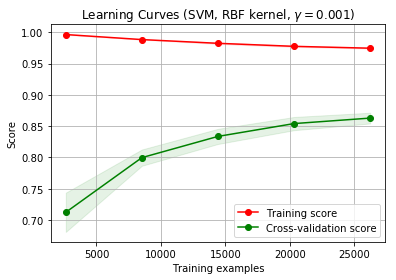

In [81]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, scoring=scoring, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.01)
#plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)
estimator = LogisticRegression(C=1)

def scoring(estimator, X, y):
    y_pred = estimator.predict_proba(X)
    return roc_auc_score(y, y_pred[:, 1])
   
plot_learning_curve(estimator, title, X_train_ohe, y_train, 
                    scoring=scoring, n_jobs=4, cv=5)

plt.show()